# ---------- DSP2017 Project ----------
## Movies preferences from music preferences
# ----------------------------------------------

### Import libraries:

In [31]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## ---------------------------------------------------------------------------------------------------------------------------------
## PREPARING MODEL  --------------------------------------------------------------------------------------------------:
## ---------------------------------------------------------------------------------------------------------------------------------

### Loading data

In [32]:
dFrame = pnd.read_csv("./data/music_and_movies_responses.csv")

In [33]:
dFrame.shape # show number of (rows, columns)


(1010, 31)

### Check if exists any null value in data frame

In [34]:
isAnyNull = dFrame.isnull()
print(isAnyNull)

      Music Slow songs or fast songs  Dance   Folk Country Classical music  \
0     False                    False  False  False   False           False   
1     False                    False  False  False   False           False   
2     False                    False  False  False   False           False   
3     False                    False  False  False   False           False   
4     False                    False  False  False   False           False   
5     False                    False  False  False   False           False   
6     False                    False  False  False   False           False   
7     False                    False  False  False   False           False   
8     False                    False  False  False   False           False   
9     False                    False  False  False   False           False   
10    False                    False  False  False   False           False   
11    False                    False  False  False   False      

In [35]:
pnd.isnull(dFrame).sum() #Check which columns contains null value and how many.

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
Classical music             7
Musical                     2
Pop                         3
Rock                        6
Metal or Hardrock           3
Punk                        8
Hiphop, Rap                 4
Reggae, Ska                 7
Swing, Jazz                 6
Rock n roll                 7
Alternative                 7
Latino                      8
Techno, Trance              7
Opera                       1
Movies                      6
Horror                      2
Thriller                    1
Comedy                      3
Romantic                    3
Sci-fi                      2
War                         2
Fantasy/Fairy tales         3
Animated                    3
Documentary                 8
Western                     4
Action                      2
dtype: int64

#### Delete rows with null value:

In [36]:
dFrame_without_null = dFrame.dropna()

dFrame_without_null.shape

(906, 31)

### Check if exists values not in scale ( < 1 or > 5)

In [37]:
print("# rows in dataframe: {0}".format(len(dFrame)))
print("# rows are < 1 -Do you like music at all?-: {0}".format(len(dFrame.loc[dFrame['Music'] < 1])))
print("# rows are < 1 -Slow or fast songs?-: {0}".format(len(dFrame.loc[dFrame["Slow songs or fast songs"] < 1])))
print("# rows are < 1 -Do you like dance music?-: {0}".format(len(dFrame.loc[dFrame["Dance"] < 1])))
print("# rows are < 1 -Do you like folk music?-: {0}".format(len(dFrame.loc[dFrame["Folk"] < 1])))
print("# rows are < 1 -Do you like music country?-: {0}".format(len(dFrame.loc[dFrame["Country"] < 1])))
print("# rows are < 1 -Do you like music classic?-: {0}".format(len(dFrame.loc[dFrame["Classical music"] < 1])))
print("# rows are < 1 -Do you like music musical?-: {0}".format(len(dFrame.loc[dFrame["Musical"] < 1])))
print("# rows are < 1 -Do you like music pop?-: {0}".format(len(dFrame.loc[dFrame["Pop"] < 1])))
print("# rows are < 1 -Do you like music rock?-: {0}".format(len(dFrame.loc[dFrame["Rock"] < 1])))
print("# rows are < 1 -Do you like music metal?-: {0}".format(len(dFrame.loc[dFrame["Metal or Hardrock"]  < 1])))
print("# rows are < 1 -Do you like music punk?-: {0}".format(len(dFrame.loc[dFrame["Punk"] < 1])))
print("# rows are < 1 -Do you like music rap?-: {0}".format(len(dFrame.loc[dFrame["Hiphop, Rap"] < 1])))
print("# rows are < 1 -Do you like music reggae?-: {0}".format(len(dFrame.loc[dFrame["Reggae, Ska"] < 1])))
print("# rows are < 1 -Do you like music jazz?-: {0}".format(len(dFrame.loc[dFrame["Swing, Jazz"] < 1])))
print("# rows are < 1 -Do you like music rock n'roll?-: {0}".format(len(dFrame.loc[dFrame["Rock n roll"] < 1])))
print("# rows are < 1 -Do you like music alternative?-: {0}".format(len(dFrame.loc[dFrame["Alternative"] < 1])))
print("# rows are < 1 -Do you like music laino?-: {0}".format(len(dFrame.loc[dFrame["Latino"] < 1])))
print("# rows are < 1 -Do you like music techno?-: {0}".format(len(dFrame.loc[dFrame["Techno, Trance"] < 1])))
print("# rows are < 1 -Do you like music opera?-: {0}".format(len(dFrame.loc[dFrame["Opera"] < 1])))
print("# rows are < 1 -Do you like movies at all?-: {0}".format(len(dFrame.loc[dFrame['Movies'] < 1])))
print("# rows are < 1 -Do you like horror?-: {0}".format(len(dFrame.loc[dFrame['Horror'] < 1])))
print("# rows are < 1 -Do you like thriller?-: {0}".format(len(dFrame.loc[dFrame['Thriller'] < 1])))
print("# rows are < 1 -Do you like comedy?-: {0}".format(len(dFrame.loc[dFrame['Comedy'] < 1])))
print("# rows are < 1 -Do you like romantic?-: {0}".format(len(dFrame.loc[dFrame['Romantic'] < 1])))
print("# rows are < 1 -Do you like sci-fi?-: {0}".format(len(dFrame.loc[dFrame['Sci-fi'] < 1])))
print("# rows are < 1 -Do you like war?-: {0}".format(len(dFrame.loc[dFrame['War'] < 1])))
print("# rows are < 1 -Do you like fantasy?-: {0}".format(len(dFrame.loc[dFrame['Fantasy/Fairy tales'] < 1])))
print("# rows are < 1 -Do you like animated?-: {0}".format(len(dFrame.loc[dFrame['Animated'] < 1])))
print("# rows are < 1 -Do you like documentary?-: {0}".format(len(dFrame.loc[dFrame['Documentary'] < 1])))
print("# rows are < 1 -Do you like western?-: {0}".format(len(dFrame.loc[dFrame['Western'] < 1])))
print("# rows are < 1 -Do you like action?-: {0}".format(len(dFrame.loc[dFrame['Action'] < 1])))

# rows in dataframe: 1010
# rows are < 1 -Do you like music at all?-: 0
# rows are < 1 -Slow or fast songs?-: 0
# rows are < 1 -Do you like dance music?-: 0
# rows are < 1 -Do you like folk music?-: 0
# rows are < 1 -Do you like music country?-: 0
# rows are < 1 -Do you like music classic?-: 0
# rows are < 1 -Do you like music musical?-: 0
# rows are < 1 -Do you like music pop?-: 0
# rows are < 1 -Do you like music rock?-: 0
# rows are < 1 -Do you like music metal?-: 0
# rows are < 1 -Do you like music punk?-: 0
# rows are < 1 -Do you like music rap?-: 0
# rows are < 1 -Do you like music reggae?-: 0
# rows are < 1 -Do you like music jazz?-: 0
# rows are < 1 -Do you like music rock n'roll?-: 0
# rows are < 1 -Do you like music alternative?-: 0
# rows are < 1 -Do you like music laino?-: 0
# rows are < 1 -Do you like music techno?-: 0
# rows are < 1 -Do you like music opera?-: 0
# rows are < 1 -Do you like movies at all?-: 0
# rows are < 1 -Do you like horror?-: 0
# rows are < 1 -Do you l

In [38]:
print("# rows in dataframe: {0}".format(len(dFrame)))
print("# rows are > 5 -Do you like music at all?-: {0}".format(len(dFrame.loc[dFrame['Music'] > 5])))
print("# rows are > 5 -Slow or fast songs?-: {0}".format(len(dFrame.loc[dFrame["Slow songs or fast songs"] > 5])))
print("# rows are > 5 -Do you like dance music?-: {0}".format(len(dFrame.loc[dFrame["Dance"] > 5])))
print("# rows are > 5 -Do you like folk music?-: {0}".format(len(dFrame.loc[dFrame["Folk"] > 5])))
print("# rows are > 5 -Do you like music country?-: {0}".format(len(dFrame.loc[dFrame["Country"] > 5])))
print("# rows are > 5 -Do you like music classic?-: {0}".format(len(dFrame.loc[dFrame["Classical music"] > 5])))
print("# rows are > 5 -Do you like music musical?-: {0}".format(len(dFrame.loc[dFrame["Musical"] > 5])))
print("# rows are > 5 -Do you like music pop?-: {0}".format(len(dFrame.loc[dFrame["Pop"] > 5])))
print("# rows are > 5 -Do you like music rock?-: {0}".format(len(dFrame.loc[dFrame["Rock"] > 5])))
print("# rows are > 5 -Do you like music metal?-: {0}".format(len(dFrame.loc[dFrame["Metal or Hardrock"] > 5])))
print("# rows are > 5 -Do you like music punk?-: {0}".format(len(dFrame.loc[dFrame["Punk"] > 5])))
print("# rows are > 5 -Do you like music rap?-: {0}".format(len(dFrame.loc[dFrame["Hiphop, Rap"] > 5])))
print("# rows are > 5 -Do you like music reggae?-: {0}".format(len(dFrame.loc[dFrame["Reggae, Ska"] > 5])))
print("# rows are > 5 -Do you like music jazz?-: {0}".format(len(dFrame.loc[dFrame["Swing, Jazz"] > 5])))
print("# rows are > 5 -Do you like music rock n'roll?-: {0}".format(len(dFrame.loc[dFrame["Rock n roll"] > 5])))
print("# rows are > 5 -Do you like music alternative?-: {0}".format(len(dFrame.loc[dFrame["Alternative"] > 5])))
print("# rows are > 5 -Do you like music laino?-: {0}".format(len(dFrame.loc[dFrame["Latino"] > 5])))
print("# rows are > 5 -Do you like music techno?-: {0}".format(len(dFrame.loc[dFrame["Techno, Trance"] > 5])))
print("# rows are > 5 -Do you like music opera?-: {0}".format(len(dFrame.loc[dFrame["Opera"] > 5])))
print("# rows are > 5 -Do you like movies at all?-: {0}".format(len(dFrame.loc[dFrame['Movies'] > 5])))
print("# rows are > 5 -Do you like horror?-: {0}".format(len(dFrame.loc[dFrame['Horror'] > 5])))
print("# rows are > 5 -Do you like thriller?-: {0}".format(len(dFrame.loc[dFrame['Thriller'] > 5])))
print("# rows are > 5 -Do you like comedy?-: {0}".format(len(dFrame.loc[dFrame['Comedy'] > 5])))
print("# rows are > 5 -Do you like romantic?-: {0}".format(len(dFrame.loc[dFrame['Romantic'] > 5])))
print("# rows are > 5 -Do you like sci-fi?-: {0}".format(len(dFrame.loc[dFrame['Sci-fi'] > 5])))
print("# rows are > 5 -Do you like war?-: {0}".format(len(dFrame.loc[dFrame['War'] > 5])))
print("# rows are > 5 -Do you like fantasy?-: {0}".format(len(dFrame.loc[dFrame['Fantasy/Fairy tales'] > 5])))
print("# rows are > 5 -Do you like animated?-: {0}".format(len(dFrame.loc[dFrame['Animated'] > 5])))
print("# rows are > 5 -Do you like documentary?-: {0}".format(len(dFrame.loc[dFrame['Documentary'] > 5])))
print("# rows are > 5 -Do you like western?-: {0}".format(len(dFrame.loc[dFrame['Western'] > 5])))
print("# rows are > 5 -Do you like action?-: {0}".format(len(dFrame.loc[dFrame['Action'] > 5])))

# rows in dataframe: 1010
# rows are > 5 -Do you like music at all?-: 0
# rows are > 5 -Slow or fast songs?-: 0
# rows are > 5 -Do you like dance music?-: 0
# rows are > 5 -Do you like folk music?-: 0
# rows are > 5 -Do you like music country?-: 0
# rows are > 5 -Do you like music classic?-: 0
# rows are > 5 -Do you like music musical?-: 0
# rows are > 5 -Do you like music pop?-: 0
# rows are > 5 -Do you like music rock?-: 0
# rows are > 5 -Do you like music metal?-: 0
# rows are > 5 -Do you like music punk?-: 0
# rows are > 5 -Do you like music rap?-: 0
# rows are > 5 -Do you like music reggae?-: 0
# rows are > 5 -Do you like music jazz?-: 0
# rows are > 5 -Do you like music rock n'roll?-: 0
# rows are > 5 -Do you like music alternative?-: 0
# rows are > 5 -Do you like music laino?-: 0
# rows are > 5 -Do you like music techno?-: 0
# rows are > 5 -Do you like music opera?-: 0
# rows are > 5 -Do you like movies at all?-: 0
# rows are > 5 -Do you like horror?-: 0
# rows are > 5 -Do you l

### Check if all columns in data frame are numeric:

In [39]:
dFrame.dtypes

Music                       float64
Slow songs or fast songs    float64
Dance                       float64
Folk                        float64
Country                     float64
Classical music             float64
Musical                     float64
Pop                         float64
Rock                        float64
Metal or Hardrock           float64
Punk                        float64
Hiphop, Rap                 float64
Reggae, Ska                 float64
Swing, Jazz                 float64
Rock n roll                 float64
Alternative                 float64
Latino                      float64
Techno, Trance              float64
Opera                       float64
Movies                      float64
Horror                      float64
Thriller                    float64
Comedy                      float64
Romantic                    float64
Sci-fi                      float64
War                         float64
Fantasy/Fairy tales         float64
Animated                    

### Check for correlated values:

In [40]:
def visualise_correlations(data_frame, size = 10):
    '''
    Display graphical correlations matrix for each pair of columns in data frame.
    Key:
        White - heavy correlation
        Black - without correlation
    '''
    correlations = data_frame.corr('spearman', 9)
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(correlations, cmap=plt.cm.gray)
    plt.xticks(range(len(correlations.columns)), correlations.columns)
    plt.yticks(range(len(correlations.columns)), correlations.columns)

In [41]:
dFrame_without_null.corr()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Music,1.000000,0.097455,0.074658,0.036335,-0.008724,0.064982,0.060554,0.072823,0.158202,0.026284,...,0.027479,0.076619,0.067415,0.025437,-0.029488,0.108287,0.080652,-0.044787,-0.052171,0.002965
Slow songs or fast songs,0.097455,1.000000,0.174887,-0.080284,-0.098813,-0.159165,-0.089630,0.045418,0.005688,0.055972,...,0.087276,0.077883,-0.144685,0.043111,0.031107,-0.079327,-0.019208,-0.021939,0.022224,0.111253
Dance,0.074658,0.174887,1.000000,0.061251,0.061176,-0.093136,0.082699,0.445302,-0.126148,-0.235647,...,0.090082,0.158309,0.139366,0.027701,-0.042698,0.085370,0.101309,-0.038277,-0.006880,0.103675
Folk,0.036335,-0.080284,0.061251,1.000000,0.395542,0.385753,0.262216,0.011932,0.070370,0.071204,...,-0.062298,-0.095903,0.102658,0.068469,0.046014,0.183752,0.096972,0.216366,0.165764,-0.064593
Country,-0.008724,-0.098813,0.061176,0.395542,1.000000,0.264564,0.210314,0.001145,0.135569,0.119551,...,0.023733,-0.013475,0.050341,0.152130,0.146065,0.083286,0.059090,0.153331,0.346422,0.035072
Classical music,0.064982,-0.159165,-0.093136,0.385753,0.264564,1.000000,0.348152,-0.065630,0.204871,0.178821,...,0.001632,-0.135640,0.018796,0.137421,0.113350,0.159191,0.134759,0.319529,0.150982,-0.010423
Musical,0.060554,-0.089630,0.082699,0.262216,0.210314,0.348152,1.000000,0.207930,0.088373,-0.035534,...,-0.075394,0.036549,0.284901,0.002209,-0.084030,0.271633,0.206531,0.005363,-0.004537,-0.108759
Pop,0.072823,0.045418,0.445302,0.011932,0.001145,-0.065630,0.207930,1.000000,-0.026396,-0.298883,...,0.035272,0.242089,0.270677,-0.018937,-0.158334,0.177030,0.138668,-0.148748,-0.144448,0.064628
Rock,0.158202,0.005688,-0.126148,0.070370,0.135569,0.204871,0.088373,-0.026396,1.000000,0.529387,...,0.103092,-0.038194,-0.034739,0.099350,0.078510,0.089099,0.179687,0.106617,0.108889,0.017052
Metal or Hardrock,0.026284,0.055972,-0.235647,0.071204,0.119551,0.178821,-0.035534,-0.298883,0.529387,1.000000,...,0.126087,-0.128397,-0.200736,0.173977,0.153916,-0.047530,0.037479,0.115927,0.247529,0.081634


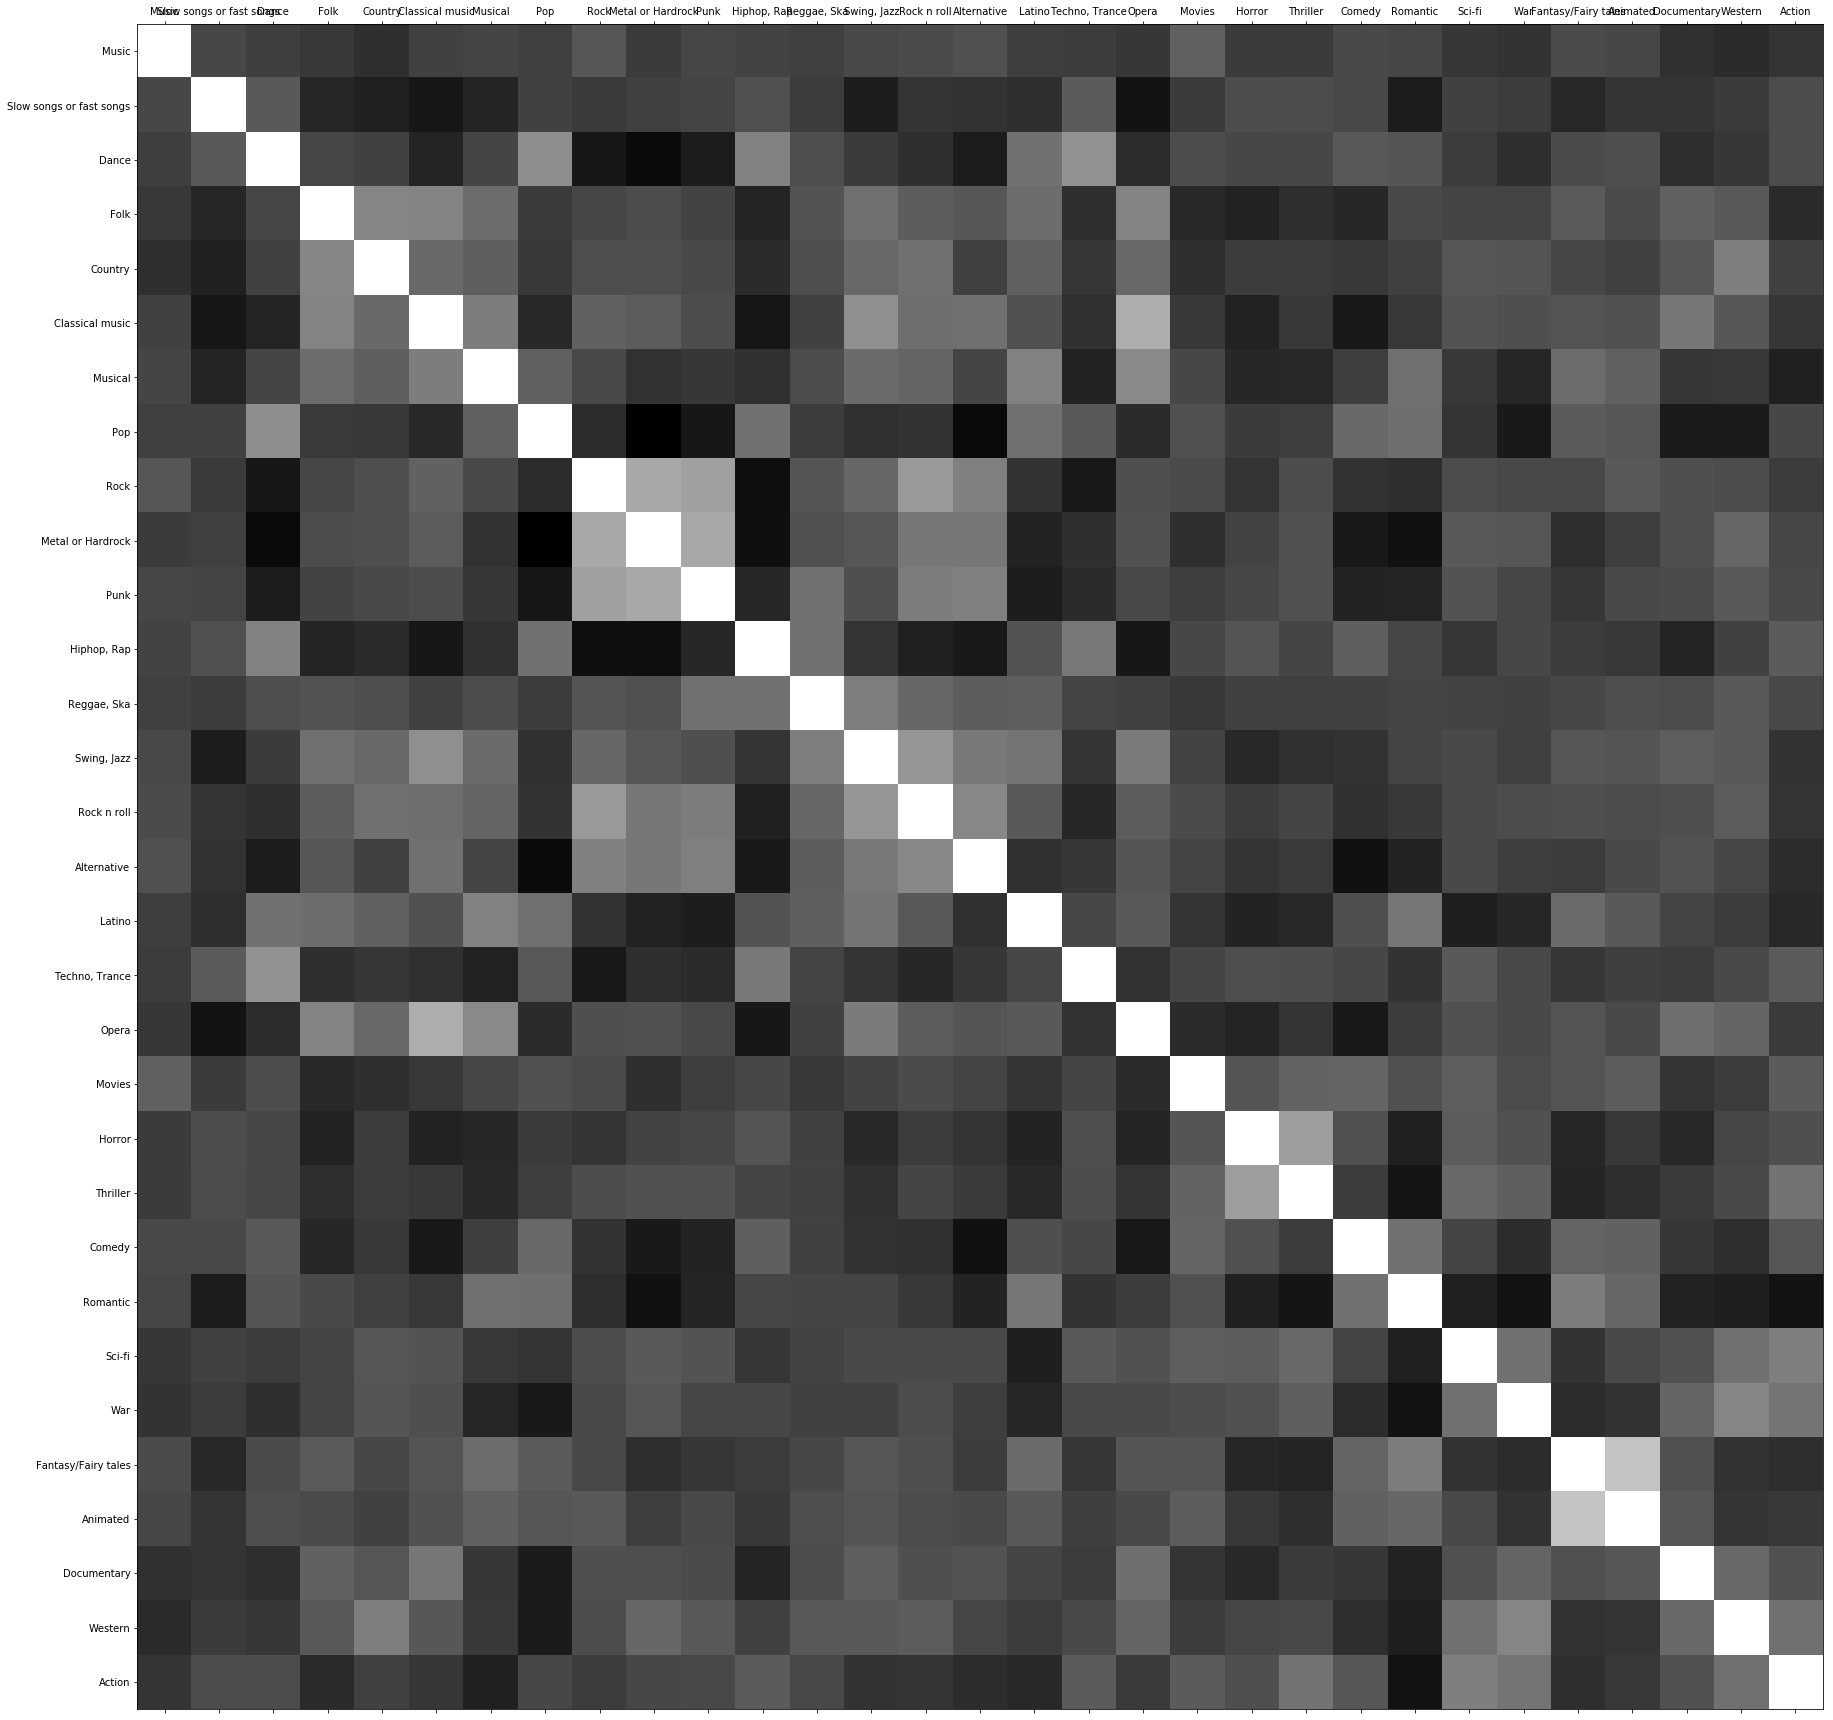

In [42]:
visualise_correlations(dFrame_without_null, 31)

In [43]:
dfModel = dFrame_without_null

## ---------------------------------------------------------------------------------------------------------------------------------
## TRAINING MODEL  -----------------------------------------------------------------------------------------------------:
## ---------------------------------------------------------------------------------------------------------------------------------

### Splitting the data (70% : 30%)

In [44]:
from sklearn.cross_validation import train_test_split

In [45]:
feature_columns_names = ["Music", "Slow songs or fast songs", "Dance" , "Folk", "Country", "Classical music", "Musical" 
                         , "Pop", "Rock", "Metal or Hardrock", "Punk", "Hiphop, Rap", "Reggae, Ska", "Swing, Jazz", 
                         "Rock n roll", "Alternative", "Latino", "Techno, Trance", "Opera"]

forPrediction_columns_names_all = ["Movies", "Horror", "Thriller", "Comedy", "Romantic", "Sci-fi", "War", "Fantasy/Fairy tales", 
                               "Animated", "Documentary", "Western", "Action"]

forPrediction_columns_names = ["Movies"]

In [46]:
dfFeatures = dfModel[feature_columns_names].values
dfPredicted = dfModel[forPrediction_columns_names].values
dfPredictedAll = dfModel[forPrediction_columns_names_all].values

In [47]:
split_test_size = 0.30

dfFeatures_train, dfFeatures_test, dfPredicted_train, dfPredicted_test = train_test_split(dfFeatures, dfPredicted, test_size = split_test_size,
                                                                                         random_state = 42)

### Veryfing that prediction value was split correctly:

In [48]:
print("Movies in model = 1: {0}".format(len(dfModel.loc[dfModel['Movies'] == 1])))
print("Movies in model = 2: {0}".format(len(dfModel.loc[dfModel['Movies'] == 2])))
print("Movies in model = 3: {0}".format(len(dfModel.loc[dfModel['Movies'] == 3])))
print("Movies in model = 4: {0}".format(len(dfModel.loc[dfModel['Movies'] == 4])))
print("Movies in model = 5: {0}".format(len(dfModel.loc[dfModel['Movies'] == 5])))

print("Movies in training df = 1: {0}".format(len(dfPredicted_train[dfPredicted_train[:] == 1])))
print("Movies in training df = 2: {0}".format(len(dfPredicted_train[dfPredicted_train[:] == 2])))
print("Movies in training df = 3: {0}".format(len(dfPredicted_train[dfPredicted_train[:] == 3])))
print("Movies in training df = 4: {0}".format(len(dfPredicted_train[dfPredicted_train[:] == 4])))
print("Movies in training df = 5: {0}".format(len(dfPredicted_train[dfPredicted_train[:] == 5])))

print("Movies in test df = 1: {0}".format(len(dfPredicted_test[dfPredicted_test[:] == 1])))
print("Movies in test df = 2: {0}".format(len(dfPredicted_test[dfPredicted_test[:] == 2])))
print("Movies in test df = 3: {0}".format(len(dfPredicted_test[dfPredicted_test[:] == 3])))
print("Movies in test df = 4: {0}".format(len(dfPredicted_test[dfPredicted_test[:] == 4])))
print("Movies in test df = 5: {0}".format(len(dfPredicted_test[dfPredicted_test[:] == 5])))

Movies in model = 1: 2
Movies in model = 2: 9
Movies in model = 3: 69
Movies in model = 4: 177
Movies in model = 5: 649
Movies in training df = 1: 2
Movies in training df = 2: 8
Movies in training df = 3: 50
Movies in training df = 4: 123
Movies in training df = 5: 451
Movies in test df = 1: 0
Movies in test df = 2: 1
Movies in test df = 3: 19
Movies in test df = 4: 54
Movies in test df = 5: 198


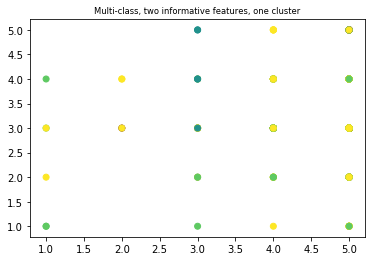

In [49]:
plt.subplot(111)
plt.title("Multi-class, two informative features, one cluster", fontsize='small')
plt.scatter(dfFeatures_train[:,0], dfFeatures_train[:,1], marker='o', c=dfPredicted_train)


### Attempt to solving problem with imbalanced data with EasyEnsemble(under-sampling):

In [50]:
from imblearn.ensemble import EasyEnsemble 
from collections import Counter

In [51]:
print('Original dataset shape {}'.format(Counter(dfPredicted_train.ravel())))

Original dataset shape Counter({5.0: 451, 4.0: 123, 3.0: 50, 2.0: 8, 1.0: 2})


In [52]:
e_ensemble = EasyEnsemble(random_state=42)
dfFt_resampled, dfPt_resampled = e_ensemble.fit_sample(dfFeatures_train, dfPredicted_train.ravel())

In [53]:
print('Resampled dataset shape {}'.format(Counter(dfPt_resampled.ravel())))

Resampled dataset shape Counter({1.0: 20, 4.0: 20, 5.0: 20, 2.0: 20, 3.0: 20})


In [54]:
print(dfPredicted_train.shape)
print(dfPt_resampled.shape)
dfPt_resampled = dfPt_resampled.reshape(100,1)

(634, 1)
(10, 10)


In [55]:
print(dfFeatures_train.shape)
print(dfFt_resampled.shape)
dfFt_resampled = dfFt_resampled.reshape(100,19)

(634, 19)
(10, 10, 19)


### Training Initial Algorithm - OneVsRestClassifier:

In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [57]:
model_OvRC = OneVsRestClassifier(LinearSVC(random_state=0))

In [58]:
model_OvRC.fit(dfFt_resampled, dfPt_resampled)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [66]:
predict_from_train = model_OvRC.predict(dfFt_resampled)

In [67]:
from sklearn import metrics
print("Accuracy from train data: {0:.4f}".format(metrics.accuracy_score(dfPt_resampled, predict_from_train)))

Accuracy from train data: 0.8000


In [68]:
predict_from_test = model_OvRC.predict(dfFeatures_test)

In [69]:
from sklearn import metrics
print("Accuracy from test data: {0:.4f}".format(metrics.accuracy_score(dfPredicted_test, predict_from_test)))

Accuracy from test data: 0.2721
